In [1]:
# Performed as a part of curriculum at Great Learning
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Consumo_cerveja.csv')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df.shape

(941, 7)

In [8]:
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [7]:
df.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [6]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [9]:
df.dropna(how='all',inplace=True)

In [10]:
df.isna().any()

Data                           False
Temperatura Media (C)          False
Temperatura Minima (C)         False
Temperatura Maxima (C)         False
Precipitacao (mm)              False
Final de Semana                False
Consumo de cerveja (litros)    False
dtype: bool

In [11]:
df.replace({',':'.'},regex=True,inplace=True)

In [12]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [13]:
df['Data']=pd.to_datetime(df['Data'])

In [15]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Day']=df['Data'].apply(lambda a :days[a.weekday()])
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

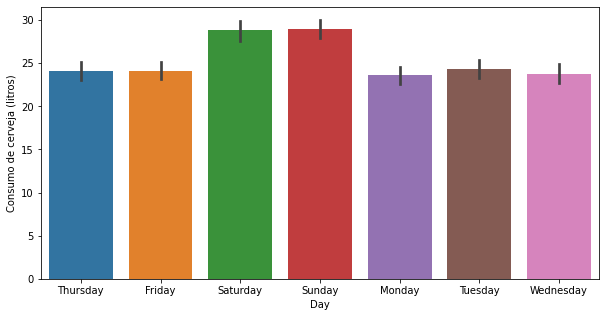

In [20]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x="Day",y="Consumo de cerveja (litros)",data=df)

In [21]:
df.drop(['Data','Day'],axis=1,inplace=True)

In [29]:
#Converting data to float
df=df.apply(pd.to_numeric)

In [23]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


In [24]:
from sklearn.model_selection import train_test_split
x=df.drop('Consumo de cerveja (litros)',axis=1)

In [25]:
y=df['Consumo de cerveja (litros)']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred=lr.predict(x_test)

In [33]:
y_pred

array([25.60008014, 27.06877385, 28.11275655, 21.57537646, 27.29347657,
       17.96214084, 22.43132448, 18.85518829, 18.04043779, 20.83064758,
       32.02979766, 26.88537202, 25.28984605, 25.74571583, 20.6053303 ,
       22.29514317, 28.05015283, 27.19425957, 24.65694159, 28.64238252,
       34.33046279, 21.9006268 , 29.59119372, 19.53113689, 24.87223847,
       24.69346949, 29.00415175, 30.14043339, 22.82207992, 24.11829119,
       24.5916828 , 29.61756452, 28.26128808, 32.29803338, 23.59209206,
       27.01962067, 27.46840097, 23.59248636, 25.096739  , 31.47367615,
       28.05312488, 32.00624744, 27.80995205, 24.39195411, 25.06237086,
       31.59058938, 24.73061051, 25.15557835, 26.15809444, 29.17188161,
       28.94974476, 31.74422993, 31.42553308, 33.64002652, 20.31965281,
       25.77543848, 31.14232536, 30.51589219, 27.37979187, 24.26798943,
       22.4260935 , 28.04076493, 24.78473964, 23.55530259, 29.23599875,
       29.38710822, 25.22670618, 19.81578848, 20.19980465, 23.93

In [32]:
print(lr.score(x_test,y_test))

0.7427938181737361
